In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

%load_ext autoreload
%autoreload 2

# Dataset Exploration

Run the following cells to get an overview of the flood image dataset and visualize training examples:

In [3]:
root_data_path = "../data"

frame_path = os.path.join(root_data_path, "image")
mask_path = os.path.join(root_data_path, "mask")

# Get list of all available frames and masks
available_frames = sorted([os.path.join(frame_path, path) for path in os.listdir(frame_path)])
available_masks = sorted([os.path.join(mask_path, path) for path in os.listdir(mask_path)])

print(f"Num Frames: {len(available_frames):,}")
print(f"Num Masks: {len(available_masks):,}")

Num Frames: 290
Num Masks: 290


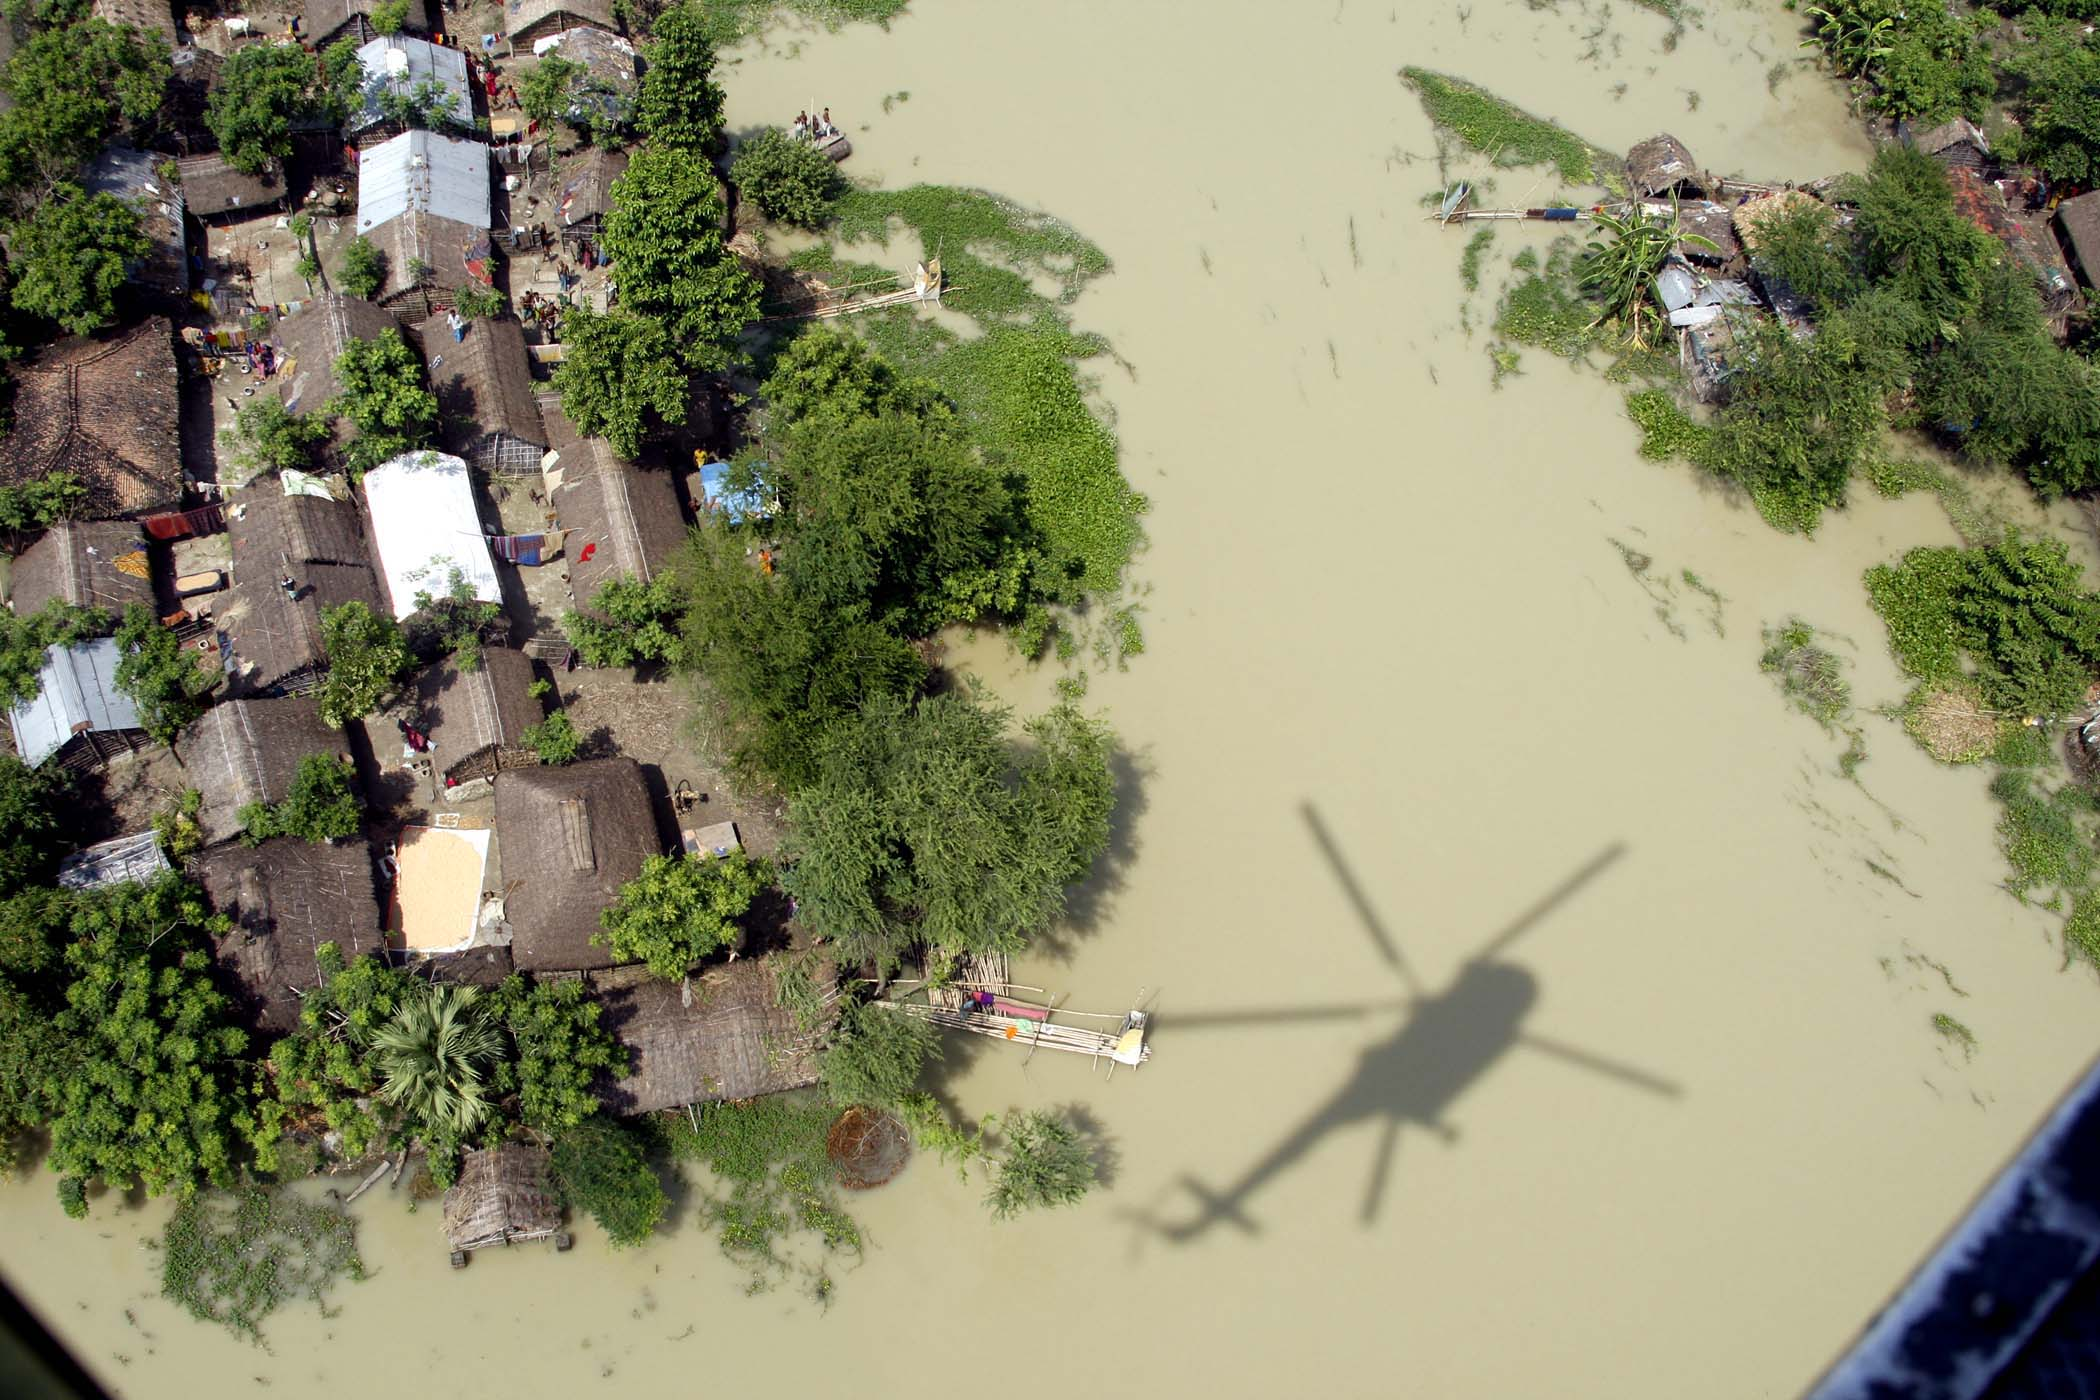

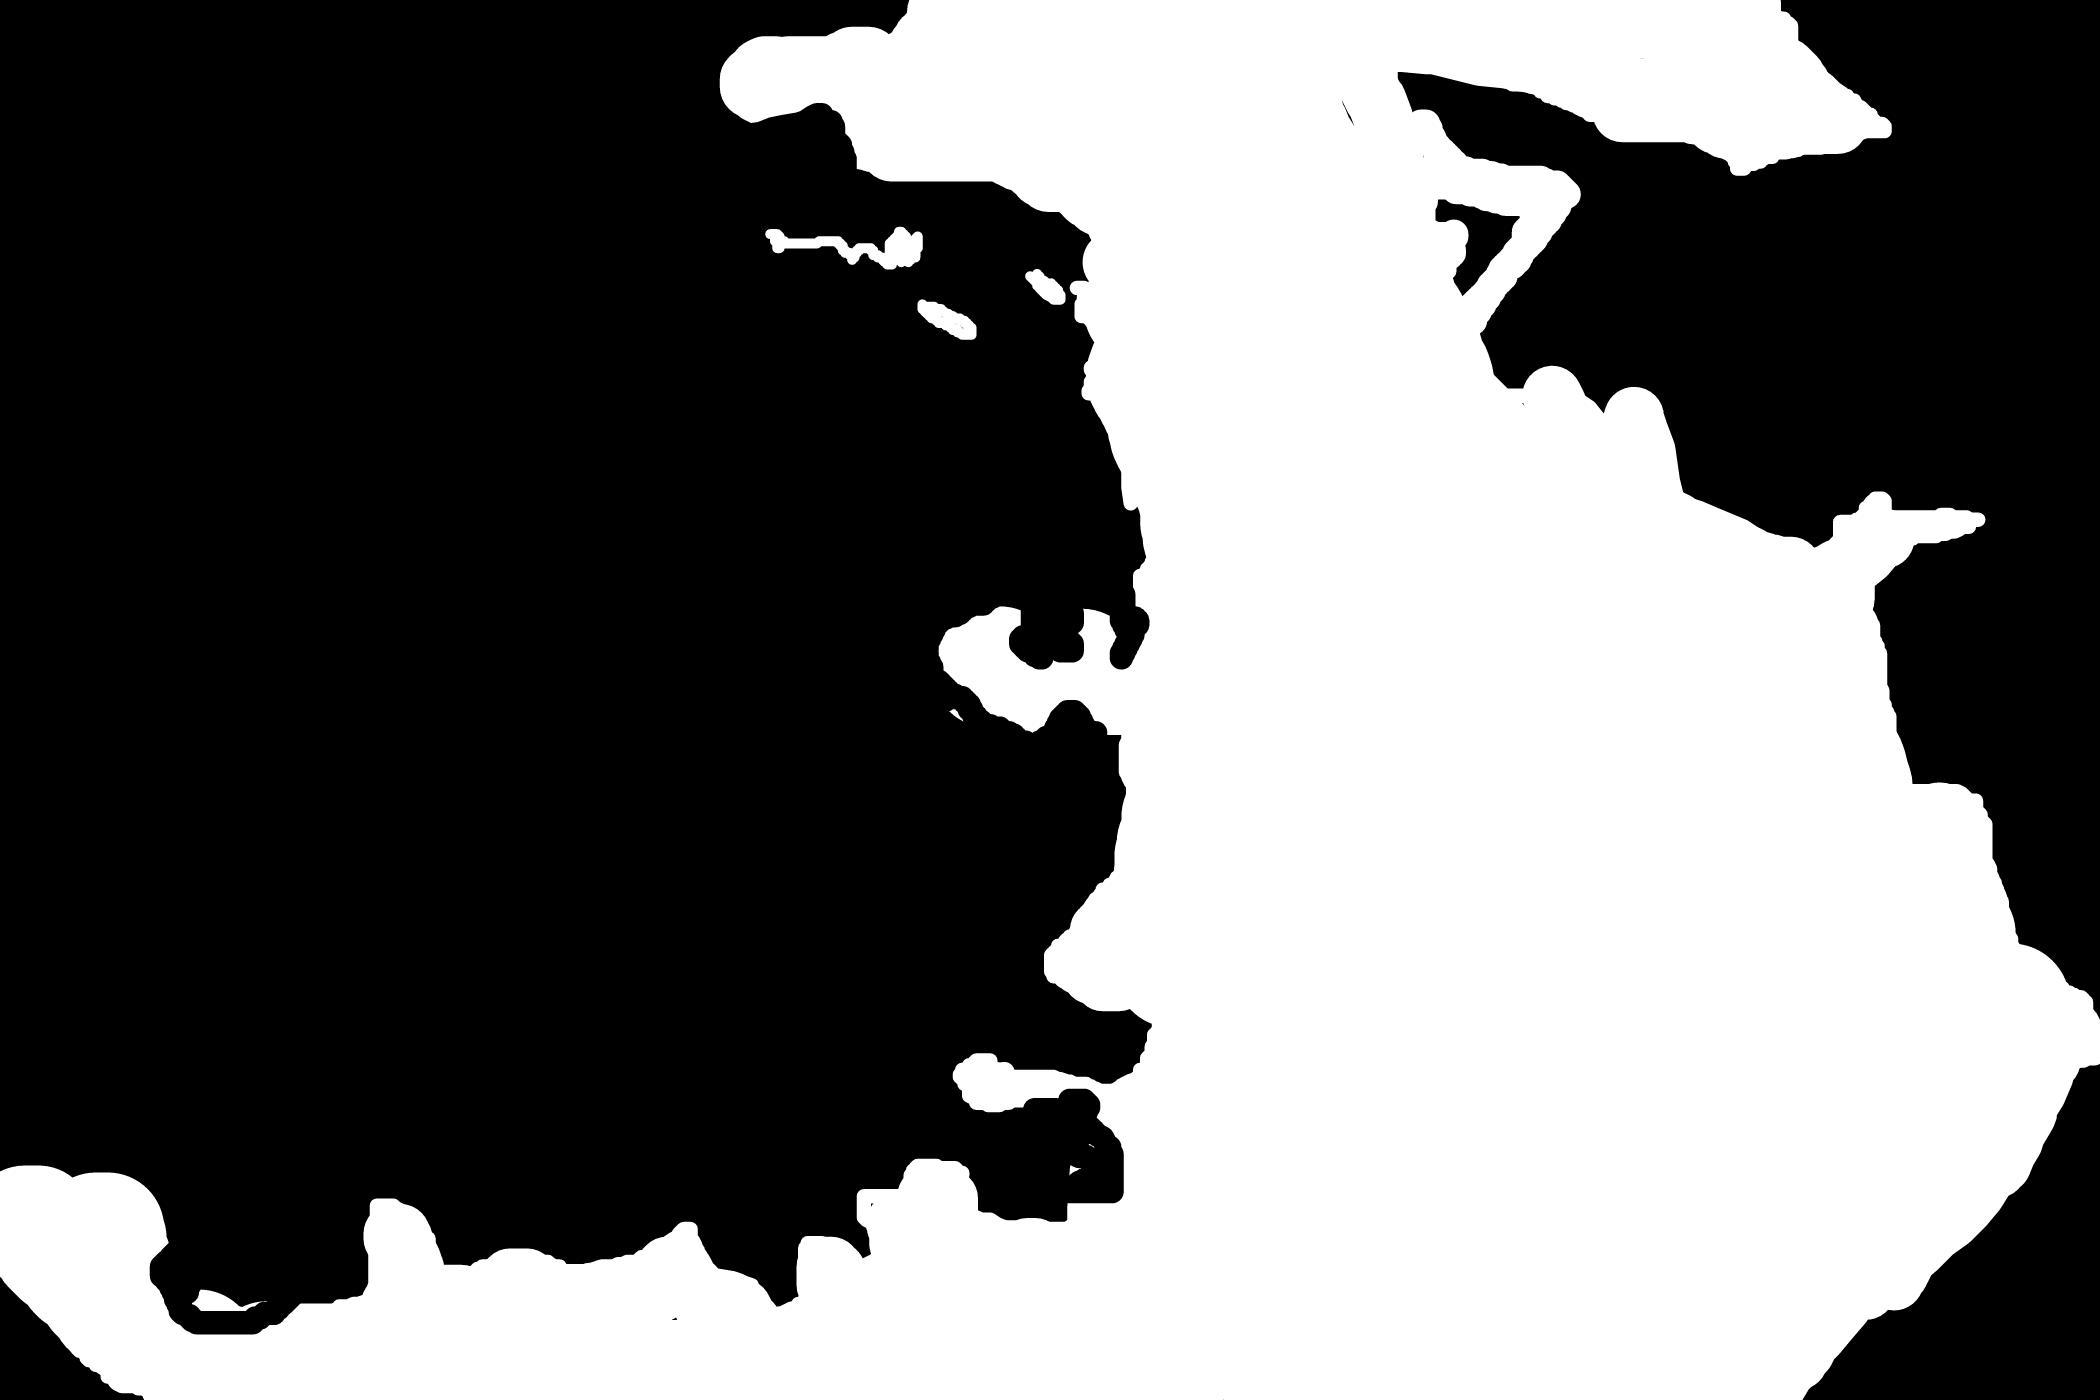

In [4]:
idx = 7

frame = Image.open(available_frames[idx])
mask = Image.open(available_masks[idx])

display(frame)
display(mask)

## Train & Validation Split

In order to evaluate our model as it trains, we can split our dataset into training and validation segments.

In [ ]:
meta_path = os.path.join(root_data_path, "metadata.csv")
meta_df = pd.read_csv(meta_path)

In [ ]:
# Shuffle rows of DataFrame with random state
shuffled_df = meta_df.sample(frac=1.0, random_state=42)

# Take top X% of rows, where X is the percentage of training data to use
# For this example, we use 85%
training_proportion = 0.85
num_training_examples = int(training_proportion * meta_df.shape[0])

train_df = shuffled_df.iloc[:num_training_examples, :]
val_df = shuffled_df.iloc[num_training_examples:, :]

print(f"Num Training Examples: {train_df.shape[0]}")
print(f"Num Validation Examples: {val_df.shape[0]}")

In [ ]:
# Write new CSV files for train and val
train_path = os.path.join(root_data_path, "train.csv")
val_path = os.path.join(root_data_path, "val.csv")

train_df.to_csv(train_path, index=None)
val_df.to_csv(val_path, index=None)

In [ ]:
df = pd.read_csv(train_path)

In [ ]:
df['image'].tolist()